In [1]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



In [2]:
# Import Data
X_train= pd.read_csv('/Users/cuicuisong/Desktop/data/train_all_feature.csv',  index_col=0)
X_test= pd.read_csv('/Users/cuicuisong/Desktop/data/test_all_feature.csv',  index_col=0)
y_train= pd.read_csv('/Users/cuicuisong/Desktop/data/y_train_new.csv')
y_test= pd.read_csv('/Users/cuicuisong/Desktop/data/y_test_new.csv')

In [222]:
print(y_test['PotentialFraud'].value_counts())

0    979
1    103
Name: PotentialFraud, dtype: int64


In [223]:
X_train.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,totalProcCode_3722,totalProcCode_8151,totalProcCode_8872,totalProcCode_9671,totalProcCode_4513,totalProcCode_5849,totalProcCode_9390,totalProcCode_Other,TotalTeDiagCode,TotalTeProcCode
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,213.600000,1068.0,12.000000,12.000000,2615.200000,13460,65380,463.920000,2700,11598,...,0,0,0,0,0,0,0,125,1.166158,1.186518
PRV51004,2.080537,100.0,11.865772,11.959732,2194.899329,20900,327040,622.751678,7410,92790,...,0,0,0,0,0,0,0,745,1.144495,1.161067
PRV51005,3.175966,200.0,11.907296,11.939914,2109.733906,97510,2457840,636.328755,6330,741323,...,0,0,0,0,0,0,0,5825,1.174065,1.161067
PRV51008,53.860465,1068.0,12.000000,12.000000,2570.465116,20500,110530,616.046512,4140,26490,...,0,0,0,0,0,0,0,215,1.144524,1.163394
PRV51011,23.586207,1068.0,12.000000,12.000000,1399.310345,6340,81160,366.724138,1070,21270,...,0,0,0,0,0,0,0,290,1.141459,1.161067


In [224]:
X_test.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,totalProcCode_3722,totalProcCode_8151,totalProcCode_8872,totalProcCode_9671,totalProcCode_4513,totalProcCode_5849,totalProcCode_9390,totalProcCode_Other,TotalTeDiagCode,TotalTeProcCode
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51003,502.166667,1068.0,11.818182,11.871212,2678.181818,31880,353520,737.121212,9950,97300,...,0,0,0,0,0,0,0,660,1.180504,1.100834
PRV51007,45.333333,1068.0,11.833333,11.833333,1729.722222,6060,124540,469.722222,1970,33820,...,0,0,0,0,0,0,0,360,1.014301,1.022005
PRV51025,164.183908,1068.0,12.000000,12.000000,2288.965517,23330,199140,621.379310,8280,54060,...,0,0,0,0,0,0,0,435,1.035489,1.052657
PRV51026,4.473684,100.0,11.684211,12.000000,1811.578947,6700,137680,680.394737,2700,51710,...,0,0,0,0,0,0,0,380,0.999096,1.022881
PRV51041,7.941176,100.0,12.000000,12.000000,2287.647059,28900,77780,613.823529,7680,20870,...,0,0,0,0,0,0,0,170,0.990358,1.022881


In [225]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4328, 104)

(1082, 104)

(4328, 1)

(1082, 1)

In [3]:
# fill NA as 0, X_test has two null values
X_test.fillna(0,inplace=True)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score
from sklearn.decomposition import PCA

#### I. Baseline model

In [5]:
steps = [('rescale', StandardScaler()), 
         ('logreg', LogisticRegression(random_state=42,max_iter=10000))]
model = Pipeline(steps)
model.fit(X_train, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [6]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [230]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3925
           1       0.88      0.75      0.81       403

    accuracy                           0.97      4328
   macro avg       0.93      0.87      0.89      4328
weighted avg       0.97      0.97      0.97      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       979
           1       0.00      0.00      0.00       103

    accuracy                           0.90      1082
   macro avg       0.45      0.50      0.48      1082
weighted avg       0.82      0.90      0.86      1082



Text(0.5, 1.0, 'Test ROC Curve')

<Figure size 432x288 with 0 Axes>

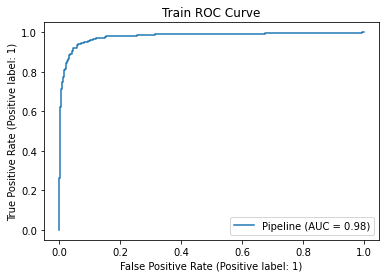

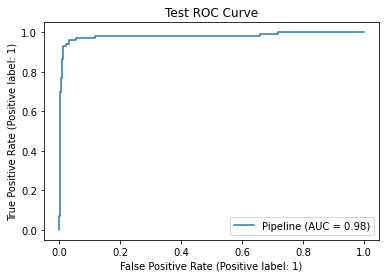

In [231]:
from sklearn.metrics import plot_roc_curve 

plt.figure(1).clf()

plot_roc_curve(model, X_train, y_train)

plt.title('Train ROC Curve')

plot_roc_curve(model, X_test, y_test)
plt.title('Test ROC Curve')

In [7]:
y_train_proba= model.predict_proba(X_train)
y_test_proba= model.predict_proba(X_test)

y_train_score = y_train_proba[:, 1]
y_test_score = y_test_proba [:, 1]

PR-AUC is 0.89


Text(0.5, 1.0, 'Precision-Recall Curve of Train')

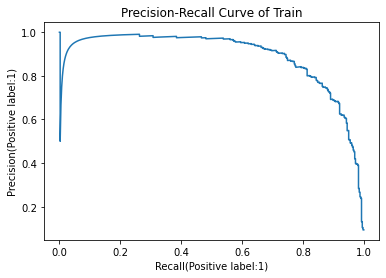

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

# Data to plot precision - recall curve
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrain = auc(recall_train, precision_train)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrain))

# plot PR curve
plt.plot(recall_train, precision_train)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train')


PR-AUC is 0.91


Text(0.5, 1.0, 'Precision-Recall Curve of Test ')

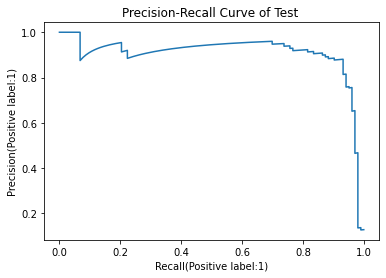

In [9]:
# test

# Data to plot precision - recall curve
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_test_score)
auc_precision_recall_test = auc(recall_test, precision_test)
print('PR-AUC is {:.2f}'.format(auc_precision_recall_test))

# plot PR curve
plt.plot(recall_test, precision_test)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test ')

In [235]:
# 1.2 Feature importance

In [11]:
# calculate the feature score
# model[1]: logisticregression
importance = model[1].coef_[0]
importance= abs(importance)
for i,j in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,j))

Feature: 0, Score: 0.01861
Feature: 1, Score: 0.41532
Feature: 2, Score: 0.06888
Feature: 3, Score: 0.15516
Feature: 4, Score: 0.22427
Feature: 5, Score: 0.09361
Feature: 6, Score: 0.10554
Feature: 7, Score: 0.23236
Feature: 8, Score: 0.19987
Feature: 9, Score: 0.37962
Feature: 10, Score: 0.41497
Feature: 11, Score: 0.10843
Feature: 12, Score: 0.10798
Feature: 13, Score: 0.09880
Feature: 14, Score: 1.22145
Feature: 15, Score: 0.11752
Feature: 16, Score: 0.11731
Feature: 17, Score: 0.51225
Feature: 18, Score: 0.53138
Feature: 19, Score: 0.41585
Feature: 20, Score: 0.07046
Feature: 21, Score: 0.33084
Feature: 22, Score: 0.27051
Feature: 23, Score: 0.16993
Feature: 24, Score: 0.19192
Feature: 25, Score: 0.27868
Feature: 26, Score: 0.32089
Feature: 27, Score: 0.05171
Feature: 28, Score: 0.39149
Feature: 29, Score: 0.04890
Feature: 30, Score: 0.23272
Feature: 31, Score: 0.07249
Feature: 32, Score: 0.01025
Feature: 33, Score: 0.42351
Feature: 34, Score: 0.09815
Feature: 35, Score: 0.25016
Fe

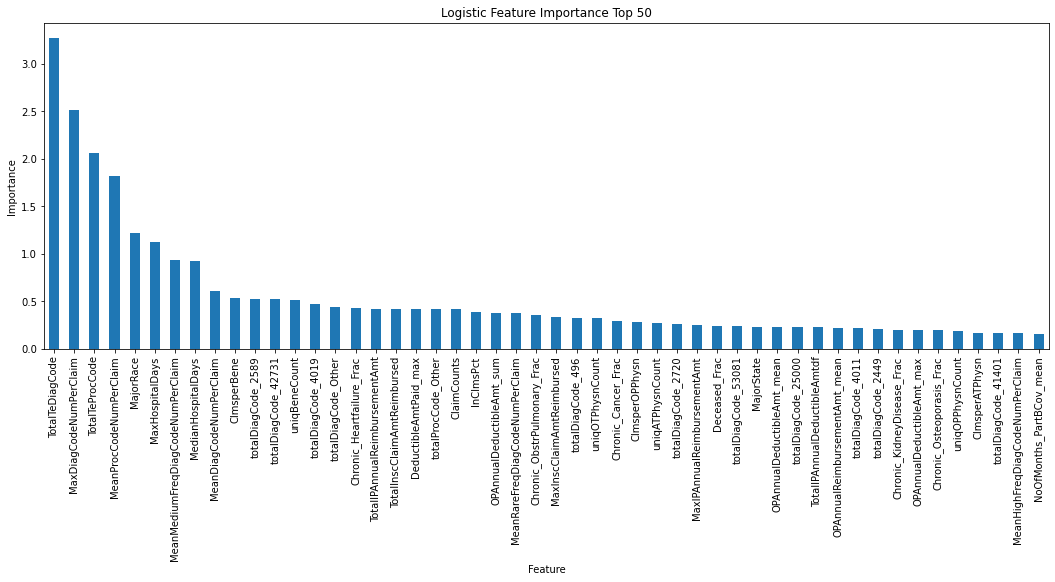

In [12]:
# plot feature importance
feature_names = X_train.columns
feature_importance = (pd.Series(importance, index = feature_names)).sort_values(ascending=False)
plt.figure(figsize=(18,6))
feature_importance[:50].plot.bar()
plt.title('Logistic Feature Importance Top 50')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


In [16]:
feature_importance.sum()

29.883704779719984

In [17]:
feature_importance[:30].sum()

23.046303942229674

In [18]:
from sklearn.feature_selection import SelectFromModel

In [19]:
pipeline1 = Pipeline([
    ('selector', SelectFromModel(estimator=LogisticRegression(random_state=42,max_iter=10000), max_features=50, threshold=-np.inf)),
    ('regressor',LogisticRegression())
])

pipeline1.fit(X_train, y_train)

selected_features1 = pipeline1['selector'].get_support()
print(selected_features1.sum())

50


In [20]:
selected_features_names1 = X_train.columns[selected_features1].tolist()
print(selected_features_names1)

['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualReimbursementAmt_mean', 'OPAnnualDeductibleAmt_mean', 'Gender', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'ClmsperBene', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'Chronic_Heartfailure_Frac', 'Chronic_Diabetes_Frac', 'Chronic_IschemicHeart_Frac', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'TotalProcCodeNum', 'MeanHighFreqDiagCodeNumPerClaim', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'TotalMediumHighFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_25000', 'totalDiagCode_V5869', 'totalDiagCode_42731', 'totalDiagCode_2720', 'totalDiagCode_2449', 'totalDiagCode_4280', 'totalDiagCode_53081', 'totalDiagCode

In [22]:
X_train_reduced50 = X_train[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualReimbursementAmt_mean', 'OPAnnualDeductibleAmt_mean', 'Gender', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'ClmsperBene', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'Chronic_Heartfailure_Frac', 'Chronic_Diabetes_Frac', 'Chronic_IschemicHeart_Frac', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'TotalProcCodeNum', 'MeanHighFreqDiagCodeNumPerClaim', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'TotalMediumHighFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_25000', 'totalDiagCode_V5869', 'totalDiagCode_42731', 'totalDiagCode_2720', 'totalDiagCode_2449', 'totalDiagCode_4280', 'totalDiagCode_53081', 'totalDiagCode_41401', 'totalDiagCode_496', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [23]:
X_test_reduced50 = X_test[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualReimbursementAmt_mean', 'OPAnnualDeductibleAmt_mean', 'Gender', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'ClmsperBene', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'Chronic_Heartfailure_Frac', 'Chronic_Diabetes_Frac', 'Chronic_IschemicHeart_Frac', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'TotalProcCodeNum', 'MeanHighFreqDiagCodeNumPerClaim', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'TotalMediumHighFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_25000', 'totalDiagCode_V5869', 'totalDiagCode_42731', 'totalDiagCode_2720', 'totalDiagCode_2449', 'totalDiagCode_4280', 'totalDiagCode_53081', 'totalDiagCode_41401', 'totalDiagCode_496', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [24]:
steps_reduced50 = [('rescale', StandardScaler()), 
         ('logreg', LogisticRegression(#C=0.1, penalty ='l2', solver = 'newton-cg' ,
             random_state=42,max_iter=10000))]
model_reduced50 = Pipeline(steps_reduced50)
model_reduced50.fit(X_train_reduced50, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [26]:
y_train_pred50= model_reduced50.predict(X_train_reduced50)
y_test_pred50 = model_reduced50.predict(X_test_reduced50)

In [27]:
y_train_proba50= model_reduced50.predict_proba(X_train_reduced50)
y_test_proba50= model_reduced50.predict_proba(X_test_reduced50)

y_train_score50 = y_train_proba50[:, 1]
y_test_score50 = y_test_proba50[:, 1]

In [28]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred50))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred50))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3925
           1       0.86      0.72      0.79       403

    accuracy                           0.96      4328
   macro avg       0.92      0.86      0.88      4328
weighted avg       0.96      0.96      0.96      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       979
           1       1.00      0.05      0.09       103

    accuracy                           0.91      1082
   macro avg       0.95      0.52      0.52      1082
weighted avg       0.92      0.91      0.87      1082



PR-AUC is 0.88


Text(0.5, 1.0, 'Precision-Recall Curve of Train 50')

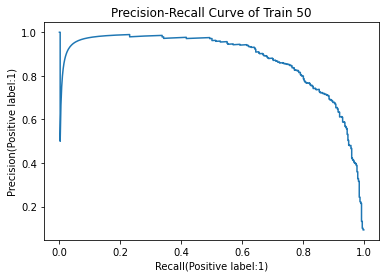

In [29]:
precision_train50, recall_train50, thresholds_train50 = precision_recall_curve(y_train, y_train_score50)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrain50 = auc(recall_train50, precision_train50)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrain50))

# plot PR curve
plt.plot(recall_train50, precision_train50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train 50')

PR-AUC is 0.91


Text(0.5, 1.0, 'Precision-Recall Curve of Test 50')

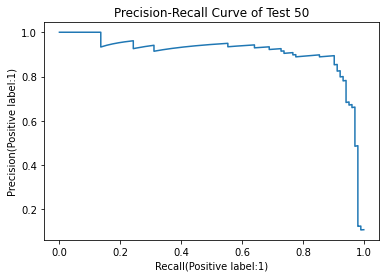

In [30]:
precision_test50, recall_test50, thresholds_test50 = precision_recall_curve(y_test, y_test_score50)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltest50 = auc(recall_test50, precision_test50)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltest50))

# plot PR curve
plt.plot(recall_test50, precision_test50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test 50')

# Note: same as all features

#### II. Modeling with balanced class weights

In [251]:
### 2.1 all features

In [31]:
steps_balanced = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model_balanced = Pipeline(steps_balanced)
model_balanced.fit(X_train, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [32]:
y_train_predbal= model_balanced .predict(X_train)
y_test_predbal = model_balanced .predict(X_test)
y_train_predbal

array([0, 0, 1, ..., 0, 0, 0])

In [33]:
y_train_probabal= model_balanced .predict_proba(X_train)
y_test_probabal= model_balanced .predict_proba(X_test)

y_train_scorebal = y_train_probabal[:, 1]
y_test_scorebal = y_test_probabal[:, 1]

In [34]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_predbal))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_predbal))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3925
           1       0.58      0.95      0.72       403

    accuracy                           0.93      4328
   macro avg       0.79      0.94      0.84      4328
weighted avg       0.96      0.93      0.94      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       979
           1       1.00      0.01      0.02       103

    accuracy                           0.91      1082
   macro avg       0.95      0.50      0.48      1082
weighted avg       0.91      0.91      0.86      1082



PR-AUC is 0.85


Text(0.5, 1.0, 'Precision-Recall Curve of Train Balanced')

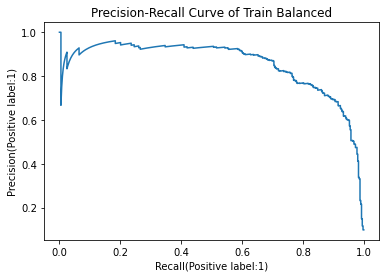

In [35]:
precision_trainbal, recall_trainbal, thresholds_trainbal = precision_recall_curve(y_train, y_train_scorebal)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrainbal = auc(recall_trainbal, precision_trainbal)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrainbal))

# plot PR curve
plt.plot(recall_trainbal, precision_trainbal)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train Balanced')

Test PR-AUC is 0.91


Text(0.5, 1.0, 'Precision-Recall Curve of Test Balanced')

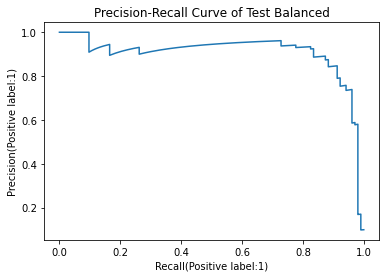

In [36]:
precision_testbal, recall_testbal, thresholds_testbal = precision_recall_curve(y_test, y_test_scorebal)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltestbal = auc(recall_testbal, precision_testbal)
print('Test PR-AUC is {:.2f}'.format(auc_precision_recalltestbal))
#print('Min threshold is {:.2f}'.format(min(thresholds_testbal), 'Max threshold is {:.2f}'.format(max(thresholds_testbal))

# plot PR curve
plt.plot(recall_testbal, precision_testbal)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test Balanced')

In [258]:
##### 2.2 50 featurs

In [259]:
steps_balanced50 = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model_balanced50 = Pipeline(steps_balanced)
model_balanced50.fit(X_train_reduced50, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [260]:
y_train_predbal50= model_balanced50.predict(X_train_reduced50)
y_test_predbal50 = model_balanced50.predict(X_test_reduced50)

In [261]:
y_train_probabal50= model_balanced50.predict_proba(X_train_reduced50)
y_test_probabal50= model_balanced50.predict_proba(X_test_reduced50)

y_train_scorebal50 = y_train_probabal50[:, 1]
y_test_scorebal50 = y_test_probabal50[:, 1]

In [262]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_predbal50))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_predbal50))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      3925
           1       0.56      0.95      0.70       403

    accuracy                           0.93      4328
   macro avg       0.78      0.94      0.83      4328
weighted avg       0.95      0.93      0.93      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       979
           1       0.95      0.18      0.31       103

    accuracy                           0.92      1082
   macro avg       0.94      0.59      0.63      1082
weighted avg       0.92      0.92      0.90      1082



In [37]:
precision_trainbal50, recall_trainbal50, thresholds_trainbal50 = precision_recall_curve(y_train, y_train_scorebal50)
auc_precision_recalltrainbal50 = auc(recall_trainbal50, precision_trainbal50)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrainbal50))

# plot PR curve
plt.plot(recall_trainbal50, precision_trainbal50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train balanced 50')

NameError: name 'y_train_scorebal50' is not defined

PR-AUC is 0.90


Text(0.5, 1.0, 'Precision-Recall Curve of Test Balanced 50')

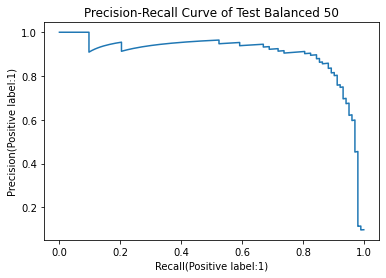

In [264]:
precision_testbal50, recall_testbal50, thresholds_testbal50 = precision_recall_curve(y_test, y_test_scorebal50)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltestbal50 = auc(recall_testbal50, precision_testbal50)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltestbal50))

# plot PR curve
plt.plot(recall_testbal50, precision_testbal50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test Balanced 50')

In [ ]:
# 50 features

In [38]:
steps_balanced50 = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model_balanced50 = Pipeline(steps_balanced)
model_balanced50.fit(X_train_reduced50, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [41]:
y_train_predbal50= model_balanced50.predict(X_train_reduced50)
y_test_predbal50 = model_balanced50.predict(X_test_reduced50)

In [42]:
y_train_probabal50= model_balanced50.predict_proba(X_train_reduced50)
y_test_probabal50= model_balanced50.predict_proba(X_test_reduced50)

y_train_scorebal50 = y_train_probabal50[:, 1]
y_test_scorebal50 = y_test_probabal50[:, 1]

In [43]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_predbal50))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_predbal50))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      3925
           1       0.56      0.95      0.70       403

    accuracy                           0.93      4328
   macro avg       0.78      0.94      0.83      4328
weighted avg       0.95      0.93      0.93      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       979
           1       0.95      0.18      0.31       103

    accuracy                           0.92      1082
   macro avg       0.94      0.59      0.63      1082
weighted avg       0.92      0.92      0.90      1082



PR-AUC is 0.85


Text(0.5, 1.0, 'Precision-Recall Curve of Train balanced 50')

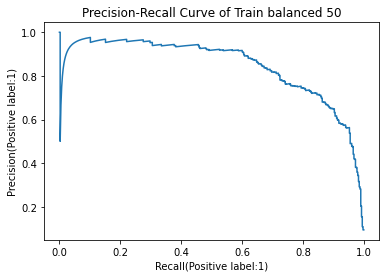

In [44]:
precision_trainbal50, recall_trainbal50, thresholds_trainbal50 = precision_recall_curve(y_train, y_train_scorebal50)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrainbal50 = auc(recall_trainbal50, precision_trainbal50)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrainbal50))

# plot PR curve
plt.plot(recall_trainbal50, precision_trainbal50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train balanced 50')

PR-AUC is 0.90


Text(0.5, 1.0, 'Precision-Recall Curve of Test Balanced 50')

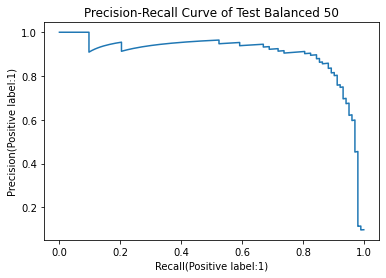

In [45]:
precision_testbal50, recall_testbal50, thresholds_testbal50 = precision_recall_curve(y_test, y_test_scorebal50)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltestbal50 = auc(recall_testbal50, precision_testbal50)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltestbal50))

# plot PR curve
plt.plot(recall_testbal50, precision_testbal50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test Balanced 50')

In [ ]:
# 2.3 25 features

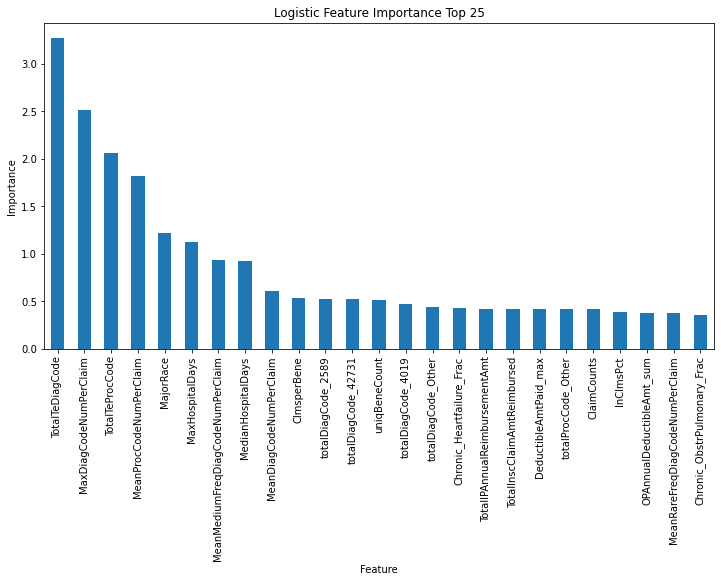

In [46]:
importance = model[1].coef_[0]
importance= abs(importance)
# plot feature importance
feature_names = X_train.columns
feature_importance = (pd.Series(importance, index = feature_names)).sort_values(ascending=False)
plt.figure(figsize=(12,6))
feature_importance[:25].plot.bar()
plt.title('Logistic Feature Importance Top 25')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


In [47]:
pipeline25 = Pipeline([
    ('selector', SelectFromModel(estimator=LogisticRegression(random_state=42,max_iter=10000), max_features=25, threshold=-np.inf)),
    ('regressor',LogisticRegression())
])
pipeline25.fit(X_train, y_train)
selected_features25 = pipeline25['selector'].get_support()
print(selected_features25.sum())

25


In [48]:
selected_features_names25 = X_train.columns[selected_features25].tolist()
print(selected_features_names25)

['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'Age', 'uniqBeneCount', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'totalDiagCode_4019', 'totalDiagCode_42731', 'totalDiagCode_41401', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeProcCode']


In [49]:
X_train_reduced25 = X_train[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'Age', 'uniqBeneCount', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'totalDiagCode_4019', 'totalDiagCode_42731', 'totalDiagCode_41401', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeProcCode']]

In [50]:
X_test_reduced25 = X_test[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'Age', 'uniqBeneCount', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'totalDiagCode_4019', 'totalDiagCode_42731', 'totalDiagCode_41401', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeProcCode']]

In [51]:
steps_reduced25 = [('rescale', StandardScaler()), 
         ('logreg', LogisticRegression( class_weight='balanced', random_state=42,max_iter=10000))]
model_reduced25 = Pipeline(steps_reduced25)
model_reduced25.fit(X_train_reduced25, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [52]:
y_train_pred25= model_reduced25.predict(X_train_reduced25)
y_test_pred25= model_reduced25.predict(X_test_reduced25)

In [53]:
y_train_proba25= model_reduced25.predict_proba(X_train_reduced25)
y_test_proba25= model_reduced25.predict_proba(X_test_reduced25)

y_train_score25= y_train_proba25[:, 1]
y_test_score25 = y_test_proba25[:, 1]

In [54]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred25))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred25))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3925
           1       0.46      0.90      0.61       403

    accuracy                           0.89      4328
   macro avg       0.73      0.89      0.78      4328
weighted avg       0.94      0.89      0.91      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       979
           1       0.59      0.80      0.67       103

    accuracy                           0.93      1082
   macro avg       0.78      0.87      0.82      1082
weighted avg       0.94      0.93      0.93      1082



PR-AUC is 0.73


Text(0.5, 1.0, 'Precision-Recall Curve of Train 50')

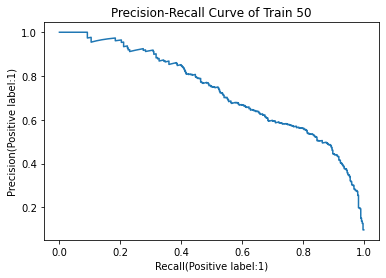

In [55]:
precision_train25, recall_train25, thresholds_train25 = precision_recall_curve(y_train, y_train_score25)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrain25 = auc(recall_train25, precision_train25)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrain25))

# plot PR curve
plt.plot(recall_train25, precision_train25)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train 50')

PR-AUC is 0.70


Text(0.5, 1.0, 'Precision-Recall Curve of Test 25')

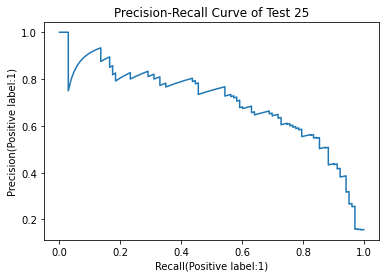

In [56]:
precision_test25, recall_test25, thresholds_test25 = precision_recall_curve(y_test, y_test_score25)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltest25 = auc(recall_test25, precision_test25)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltest25))

# plot PR curve
plt.plot(recall_test25, precision_test25)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test 25')

In [ ]:
# 2.4 15features

In [57]:
pipeline15 = Pipeline([
    ('selector', SelectFromModel(estimator=LogisticRegression(random_state=42,max_iter=10000), max_features=15, threshold=-np.inf)),
    ('regressor',LogisticRegression())
])

pipeline15.fit(X_train, y_train)

selected_features15 = pipeline15['selector'].get_support()
print(selected_features15.sum())

15


In [58]:
selected_features_names15 = X_train.columns[selected_features15].tolist()
print(selected_features_names15)

['NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'Age', 'uniqBeneCount', 'uniqATPhysnCount', 'ClmsperATPhysn', 'ClmsperOPPhysn', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum']


In [59]:
X_train_reduced15 = X_train[['NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'Age', 'uniqBeneCount', 'uniqATPhysnCount', 'ClmsperATPhysn', 'ClmsperOPPhysn', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum']]

In [60]:
X_test_reduced15 = X_test[['NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'Age', 'uniqBeneCount', 'uniqATPhysnCount', 'ClmsperATPhysn', 'ClmsperOPPhysn', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum']]

In [61]:
steps_reduced15 = [('rescale', StandardScaler()), 
         ('logreg', LogisticRegression(class_weight='balanced', random_state=42,max_iter=10000))]
model_reduced15 = Pipeline(steps_reduced15)
model_reduced15.fit(X_train_reduced15, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [62]:
y_train_pred15= model_reduced15.predict(X_train_reduced15)
y_test_pred15 = model_reduced15.predict(X_test_reduced15)

In [63]:
y_train_proba15= model_reduced15.predict_proba(X_train_reduced15)
y_test_proba15= model_reduced15.predict_proba(X_test_reduced15)

y_train_score15 = y_train_proba15[:, 1]
y_test_score15 = y_test_proba15[:, 1]

In [64]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred15))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred15))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3925
           1       0.46      0.89      0.61       403

    accuracy                           0.89      4328
   macro avg       0.73      0.89      0.77      4328
weighted avg       0.94      0.89      0.91      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       979
           1       0.44      0.90      0.59       103

    accuracy                           0.88      1082
   macro avg       0.71      0.89      0.76      1082
weighted avg       0.94      0.88      0.90      1082



PR-AUC is 0.71


Text(0.5, 1.0, 'Precision-Recall Curve of Train 15')

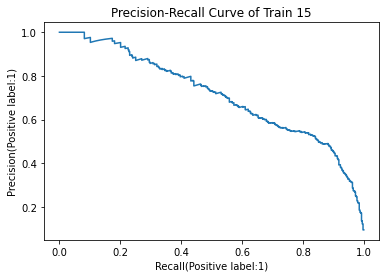

In [65]:
precision_train15,recall_train15, thresholds_train15 = precision_recall_curve(y_train, y_train_score15)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrain15 = auc(recall_train15, precision_train15)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrain15))

# plot PR curve
plt.plot(recall_train15, precision_train15)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train 15')

PR-AUC is 0.68


Text(0.5, 1.0, 'Precision-Recall Curve of Test 15')

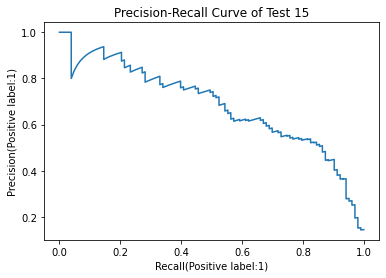

In [66]:
precision_test15, recall_test15, thresholds_test15 = precision_recall_curve(y_test, y_test_score15)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltest15 = auc(recall_test15, precision_test15)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltest15))

# plot PR curve
plt.plot(recall_test15, precision_test15)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test 15')

### III. Balanced Modeling with tune parameters

### GridsearchCV-Tune parameters

##### (1) All features: C = 0.1, penalty = 'l2', solver = 'newton-cg'   (notes: zm)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'logreg__C':[10, 1.0, 0.1, 0.01,0.005],'logreg__penalty':['l2'], 'logreg__solver':['newton-cg','lbfgs','liblinear','sag','saga']}

steps1 = [('rescale', StandardScaler()), 
           ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model1 = Pipeline(steps2)
model1_gsv = GridSearchCV(model1,param_grid,cv = 5, scoring = 'average_precision')
#average_precision_score is similar to the aucpr, but is actually a rectangular approximation, see https://datascience.stackexchange.com/questions/52130/about-sklearn-metrics-average-precision-score-documentation
model1_gsv = GridSearchCV(model1,param_grid,cv = 3, scoring = pr_auc_scorer)
model1_gsv.fit(X_train, y_train)

In [ ]:
model1_gsv.best_params_

#### (2)  50 features: tune parameters

In [ ]:
from sklearn.metrics import make_scorer

def pr_auc_score(y_true, y_score):
    
#     """
#     Generates the Area Under the Curve for precision and recall.
#     """
    precision, recall, thresholds = \
         precision_recall_curve(y_true, y_score[:, 1]) 
    return auc(recall, precision, reorder=True)

pr_auc_scorer = make_scorer(pr_auc_score, greater_is_better=True,needs_proba=True)

In [420]:
from sklearn.model_selection import GridSearchCV
param_grid = {'logreg__C':[10, 1.0, 0.1, 0.01,0.005],'logreg__penalty':['l2'], 'logreg__solver':['newton-cg','lbfgs','liblinear','sag','saga']}

steps2 = [('rescale', StandardScaler()), 
           ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model2 = Pipeline(steps2)
model2_gsv = GridSearchCV(model2,param_grid,cv = 5, scoring = 'average_precision')
#average_precision_score is similar to the aucpr, but is actually a rectangular approximation, see https://datascience.stackexchange.com/questions/52130/about-sklearn-metrics-average-precision-score-documentation
#model2_gsv = GridSearchCV(model2,param_grid,cv = 3, scoring = pr_auc_scorer)
model2_gsv.fit(X_train_reduced50, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rescale', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [10, 1.0, 0.1, 0.01, 0.005],
                         'logreg__penalty': ['l2'],
                         'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                            'sag', 'saga']},
             scoring='average_precision')

In [421]:
model2_gsv.best_params_

{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}

#### (3)  40 features: tune parameters

In [526]:
from sklearn.model_selection import GridSearchCV
param_grid = {'logreg__C':[10, 1.0, 0.1, 0.01,0.005],'logreg__penalty':['l2'], 'logreg__solver':['newton-cg','lbfgs','liblinear','sag','saga']}

steps3 = [('rescale', StandardScaler()), 
           ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model3 = Pipeline(steps3)
model3_gsv = GridSearchCV(model3,param_grid,cv = 5, scoring = 'average_precision')
#average_precision_score is similar to the aucpr, but is actually a rectangular approximation, see https://datascience.stackexchange.com/questions/52130/about-sklearn-metrics-average-precision-score-documentation
#model3_gsv = GridSearchCV(model3,param_grid,cv = 3, scoring = pr_auc_scorer)
model3_gsv.fit(X_train_reduced40, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rescale', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [10, 1.0, 0.1, 0.01, 0.005],
                         'logreg__penalty': ['l2'],
                         'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                            'sag', 'saga']},
             scoring='average_precision')

In [527]:
model3_gsv.best_params_

{'logreg__C': 1.0, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}

#### (4) 35 features: tune parameters

In [528]:
from sklearn.model_selection import GridSearchCV
param_grid = {'logreg__C':[10, 1.0, 0.1, 0.01,0.005],'logreg__penalty':['l2'], 'logreg__solver':['newton-cg','lbfgs','liblinear','sag','saga']}

steps4 = [('rescale', StandardScaler()), 
           ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model4 = Pipeline(steps4)
model4_gsv = GridSearchCV(model4,param_grid,cv = 5, scoring = 'average_precision')
#average_precision_score is similar to the aucpr, but is actually a rectangular approximation, see https://datascience.stackexchange.com/questions/52130/about-sklearn-metrics-average-precision-score-documentation
#model3_gsv = GridSearchCV(model3,param_grid,cv = 3, scoring = pr_auc_scorer)
model4_gsv.fit(X_train_reduced35, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rescale', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [10, 1.0, 0.1, 0.01, 0.005],
                         'logreg__penalty': ['l2'],
                         'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                            'sag', 'saga']},
             scoring='average_precision')

In [529]:
model4_gsv.best_params_

{'logreg__C': 1.0, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}

#### (5) 30 features: tune parameters

In [549]:
from sklearn.model_selection import GridSearchCV
param_grid = {'logreg__C':[10, 1.0, 0.1, 0.01,0.005],'logreg__penalty':['l2'], 'logreg__solver':['newton-cg','lbfgs','liblinear','sag','saga']}

steps5 = [('rescale', StandardScaler()), 
           ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model5 = Pipeline(steps5)
model5_gsv = GridSearchCV(model5,param_grid,cv = 5, scoring = 'average_precision')
#average_precision_score is similar to the aucpr, but is actually a rectangular approximation, see https://datascience.stackexchange.com/questions/52130/about-sklearn-metrics-average-precision-score-documentation
#model3_gsv = GridSearchCV(model3,param_grid,cv = 3, scoring = pr_auc_scorer)
model5_gsv.fit(X_train_reduced30, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rescale', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [10, 1.0, 0.1, 0.01, 0.005],
                         'logreg__penalty': ['l2'],
                         'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                            'sag', 'saga']},
             scoring='average_precision')

In [550]:
model5_gsv.best_params_

{'logreg__C': 1.0, 'logreg__penalty': 'l2', 'logreg__solver': 'newton-cg'}

#### (6) 25 features:tune parameters

In [552]:
param_grid = {'logreg__C':[10, 1.0, 0.1, 0.01,0.005],'logreg__penalty':['l2'], 'logreg__solver':['newton-cg','lbfgs','liblinear','sag','saga']}

steps6 = [('rescale', StandardScaler()), 
           ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model6 = Pipeline(steps6)
model6_gsv = GridSearchCV(model6,param_grid,cv = 5, scoring = 'average_precision')
#average_precision_score is similar to the aucpr, but is actually a rectangular approximation, see https://datascience.stackexchange.com/questions/52130/about-sklearn-metrics-average-precision-score-documentation
#model3_gsv = GridSearchCV(model3,param_grid,cv = 3, scoring = pr_auc_scorer)
model6_gsv.fit(X_train_reduced25, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rescale', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [10, 1.0, 0.1, 0.01, 0.005],
                         'logreg__penalty': ['l2'],
                         'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                            'sag', 'saga']},
             scoring='average_precision')

In [553]:
model6_gsv.best_params_

{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'newton-cg'}

#### (7) 20 features

In [554]:
param_grid = {'logreg__C':[10, 1.0, 0.1, 0.01,0.005],'logreg__penalty':['l2'], 'logreg__solver':['newton-cg','lbfgs','liblinear','sag','saga']}

steps7 = [('rescale', StandardScaler()), 
           ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model7 = Pipeline(steps7)
model7_gsv = GridSearchCV(model7,param_grid,cv = 5, scoring = 'average_precision')
#average_precision_score is similar to the aucpr, but is actually a rectangular approximation, see https://datascience.stackexchange.com/questions/52130/about-sklearn-metrics-average-precision-score-documentation
#model3_gsv = GridSearchCV(model3,param_grid,cv = 3, scoring = pr_auc_scorer)
model7_gsv.fit(X_train_reduced20, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rescale', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [10, 1.0, 0.1, 0.01, 0.005],
                         'logreg__penalty': ['l2'],
                         'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                            'sag', 'saga']},
             scoring='average_precision')

In [555]:
model7_gsv.best_params_

{'logreg__C': 10, 'logreg__penalty': 'l2', 'logreg__solver': 'newton-cg'}

##### 3.1 All features

In [68]:
steps_balanced1 = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(C=0.1, penalty ='l2', solver = 'newton-cg' ,class_weight = 'balanced',random_state=42,max_iter=10000))]

In [69]:
model_balanced1 = Pipeline(steps_balanced1)
model_balanced1.fit(X_train, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=10000, random_state=42,
                                    solver='newton-cg'))])

In [70]:
y_train_predbal1= model_balanced1 .predict(X_train)
y_test_predbal1= model_balanced1 .predict(X_test)


In [71]:
y_train_probabal1= model_balanced1 .predict_proba(X_train)
y_test_probabal1= model_balanced1 .predict_proba(X_test)

y_train_scorebal1 = y_train_probabal1[:, 1]
y_test_scorebal1= y_test_probabal1[:, 1]

In [72]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_predbal1))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_predbal1))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      3925
           1       0.56      0.94      0.70       403

    accuracy                           0.92      4328
   macro avg       0.77      0.93      0.83      4328
weighted avg       0.95      0.92      0.93      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       979
           1       0.92      0.11      0.19       103

    accuracy                           0.91      1082
   macro avg       0.92      0.55      0.57      1082
weighted avg       0.91      0.91      0.88      1082



In [74]:
crossval_scores= cross_val_score(model_balanced1, X_train, y_train, scoring = 'average_precision', cv=5)
crossval_scores

NameError: name 'cross_val_score' is not defined

In [441]:
crossval_scores.mean()

0.8090149141291929

PR-AUC is 0.85


Text(0.5, 1.0, 'Precision-Recall Curve of Train Balanced with Parameters')

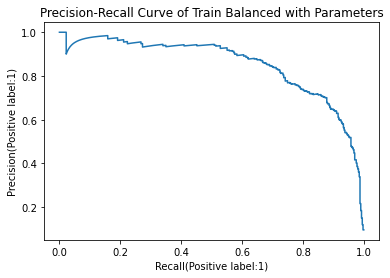

In [442]:
precision_trainbal1, recall_trainbal1, thresholds_trainbal1 = precision_recall_curve(y_train, y_train_scorebal1)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrainbal1 = auc(recall_trainbal1, precision_trainbal1)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrainbal1))

# plot PR curve
plt.plot(recall_trainbal1, precision_trainbal1, label='PR-AUC curve (PR-AUC = {:0.2f})'.format(auc_precision_recalltrainbal1))
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train Balanced with Parameters')

Test PR-AUC is 0.92
Min threshold is 0.00 Max threshold is 0.98


Text(0.5, 1.0, 'Precision-Recall Curve of Test Balanced with Parameters')

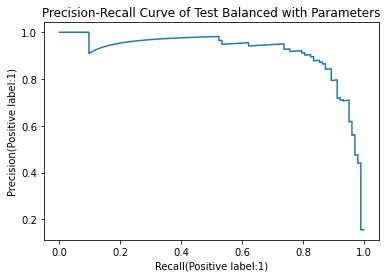

In [166]:
precision_testbal1, recall_testbal1, thresholds_testbal1 = precision_recall_curve(y_test, y_test_scorebal1)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltestbal1 = auc(recall_testbal1, precision_testbal1)
print('Test PR-AUC is {:.2f}'.format(auc_precision_recalltestbal1))
print('Min threshold is {:.2f}'.format(min(thresholds_testbal1)), 'Max threshold is {:.2f}'.format(max(thresholds_testbal1)))
# plot PR curve
plt.plot(recall_testbal1, precision_testbal1)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test Balanced with Parameters')

Text(0.5, 1.0, 'Precision and Recall Score versus Threshold')

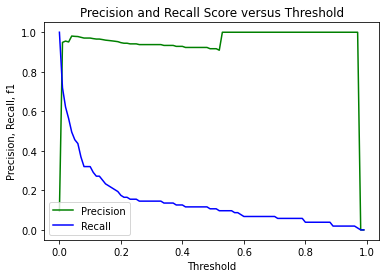

In [444]:
thresholds = np.arange(0, 1.0, 0.01)
precision_lst=[]
recall_lst=[]
f1_lst = []
for i in thresholds:
    y_test_predbal1= (y_test_probabal1[:, 1]>= i).astype(int)
    precision_lst.append(precision_score(y_test, y_test_predbal1))
    recall_lst.append(recall_score(y_test, y_test_predbal1))
    #f1_lst.append(f1_score(y_test, y_test_prednew))
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision_lst, "g-", label="Precision")
plt.plot(thresholds, recall_lst, "b-", label="Recall")
#plt.plot(thresholds, f1_lst, "r-", label="f1")
plt.ylabel("Precision, Recall, f1")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.title('Precision and Recall Score versus Threshold')

In [ ]:
##### 3.2 50 featurs

In [89]:
steps1_balanced50 = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(C=0.1, penalty ='l2', solver = 'lbfgs' , class_weight = 'balanced',random_state=42,max_iter=10000))]
model1_balanced50 = Pipeline(steps1_balanced50)
model1_balanced50.fit(X_train_reduced50, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=10000, random_state=42,
                                    solver='newton-cg'))])

In [90]:
y_train1_predbal50= model1_balanced50.predict(X_train_reduced50)
y_test1_predbal50 = model1_balanced50.predict(X_test_reduced50)

In [91]:
y_train1_probabal50= model1_balanced50.predict_proba(X_train_reduced50)
y_test1_probabal50= model1_balanced50.predict_proba(X_test_reduced50)

y_train1_scorebal50 = y_train1_probabal50[:, 1]
y_test1_scorebal50 = y_test1_probabal50[:, 1]

NameError: name 'thresholds' is not defined

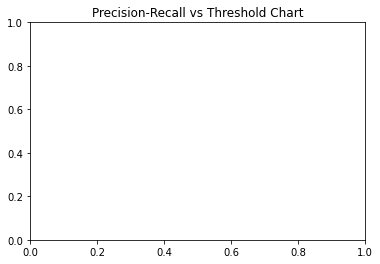

In [84]:
thresholds1 = np.arange(0, 1.0, 0.01)
precision_lst1=[]
recall_lst1=[]
# f1_lst = []
for i in thresholds1:
    y_test1_predbal50 = (y_test1_probabal50[:, 1]>= i).astype(int)
    precision_lst1.append(precision_score(y_test, y_test1_predbal50))
    recall_lst1.append(recall_score(y_test, y_test1_predbal50))
    #f1_lst.append(f1_score(y_test, y_test_prednew))
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision_lst, "g-", label="Precision")
plt.plot(thresholds, recall_lst, "b-", label="Recall")
#plt.plot(thresholds, f1_lst, "r-", label="f1")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.title('Precision and Recall Score versus Threshold')

In [92]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train1_predbal50))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test1_predbal50))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3925
           1       0.53      0.94      0.68       403

    accuracy                           0.92      4328
   macro avg       0.76      0.93      0.81      4328
weighted avg       0.95      0.92      0.93      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       979
           1       0.97      0.28      0.44       103

    accuracy                           0.93      1082
   macro avg       0.95      0.64      0.70      1082
weighted avg       0.93      0.93      0.91      1082



In [ ]:
# train_scores = cross_val_score(model, X_train, y_train, scoring = 'average_precision', cv=5)

In [457]:
crossval_scores50 = cross_val_score(model1_balanced50, X_train_reduced50, y_train, scoring = 'average_precision', cv=5)
crossval_scores50

array([0.87886699, 0.87702312, 0.79050513, 0.75557602, 0.77377608])

In [458]:
crossval_scores50.mean()

0.8151494673122152

PR-AUC is 0.84


Text(0.5, 1.0, 'Precision-Recall Curve of Train balanced parameters 50')

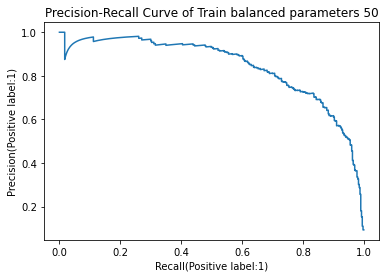

In [93]:
precision1_trainbal50, recall1_trainbal50, thresholds1_trainbal50 = precision_recall_curve(y_train, y_train1_scorebal50)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision1_recalltrainbal50 = auc(recall1_trainbal50, precision1_trainbal50)
print('PR-AUC is {:.2f}'.format(auc_precision1_recalltrainbal50))

# plot PR curve
plt.plot(recall1_trainbal50, precision1_trainbal50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train balanced parameters 50')

PR-AUC is 0.90


Text(0.5, 1.0, 'Precision-Recall Curve of Test Balanced Parameters 50')

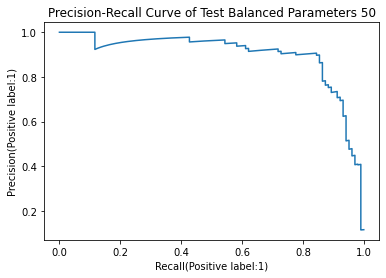

In [94]:
precision1_testbal50, recall1_testbal50, thresholds1_testbal50 = precision_recall_curve(y_test, y_test1_scorebal50)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision1_recalltestbal50 = auc(recall1_testbal50, precision1_testbal50)
print('PR-AUC is {:.2f}'.format(auc_precision1_recalltestbal50))

# plot PR curve
plt.plot(recall1_testbal50, precision1_testbal50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test Balanced Parameters 50')

In [ ]:
# 2.3 25 features

In [95]:
steps1_balanced25 = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(C=0.1, penalty ='l2', solver = 'newton-cg' , class_weight = 'balanced',random_state=42,max_iter=10000))]
model1_balanced25 = Pipeline(steps1_balanced25)
model1_balanced25.fit(X_train_reduced25, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=10000, random_state=42,
                                    solver='newton-cg'))])

In [96]:
y_train1_predbal25= model1_balanced25.predict(X_train_reduced25)
y_test1_predbal25 = model1_balanced25.predict(X_test_reduced25)

In [97]:
y_train1_probabal25 = model1_balanced25.predict_proba(X_train_reduced25)
y_test1_probabal25 = model1_balanced25.predict_proba(X_test_reduced25)

y_train1_scorebal25 = y_train1_probabal25[:, 1]
y_test1_scorebal25 = y_test1_probabal25[:, 1]

In [98]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train1_predbal25))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test1_predbal25))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3925
           1       0.46      0.90      0.61       403

    accuracy                           0.89      4328
   macro avg       0.73      0.89      0.77      4328
weighted avg       0.94      0.89      0.91      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       979
           1       0.55      0.79      0.65       103

    accuracy                           0.92      1082
   macro avg       0.76      0.86      0.80      1082
weighted avg       0.94      0.92      0.92      1082



PR-AUC is 0.73


Text(0.5, 1.0, 'Precision-Recall Curve of Test Balanced Parameters25')

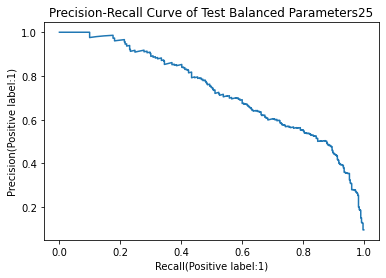

In [99]:
precision1_trainbal25, recall1_trainbal25, thresholds1_trainbal25 = precision_recall_curve(y_train, y_train1_scorebal25)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision1_recalltrainbal25 = auc(recall1_trainbal25, precision1_trainbal25)
print('PR-AUC is {:.2f}'.format(auc_precision1_recalltrainbal25))

# plot PR curve
plt.plot(recall1_trainbal25, precision1_trainbal25)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test Balanced Parameters25')

PR-AUC is 0.71


Text(0.5, 1.0, 'Precision-Recall Curve of Test Balanced Parameters25')

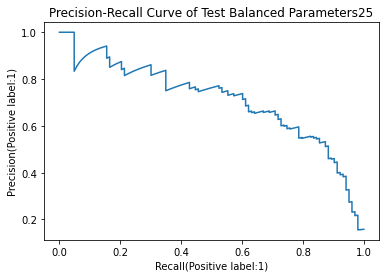

In [100]:
precision1_testbal25, recall1_testbal25, thresholds1_testbal25 = precision_recall_curve(y_test, y_test1_scorebal25)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision1_recalltestbal25 = auc(recall1_testbal25, precision1_testbal25)
print('PR-AUC is {:.2f}'.format(auc_precision1_recalltestbal25))

# plot PR curve
plt.plot(recall1_testbal25, precision1_testbal25)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test Balanced Parameters25')

In [101]:
crossval_scores25 = cross_val_score(model1_balanced25, X_train_reduced25, y_train, scoring = 'average_precision', cv=5)
crossval_scores25

NameError: name 'cross_val_score' is not defined

In [563]:
crossval_scores25.mean()

0.7223126176544877

In [102]:
# 2.4 40 features
pipeline40 = Pipeline([
    ('selector', SelectFromModel(estimator=LogisticRegression(random_state=42,max_iter=10000), max_features=40, threshold=-np.inf)),
    ('regressor',LogisticRegression())
])

pipeline40.fit(X_train, y_train)

selected_features40 = pipeline40['selector'].get_support()
print(selected_features40.sum())

40


In [103]:
selected_features_names40 = X_train.columns[selected_features40].tolist()
print(selected_features_names40)

['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'ClmsperBene', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'TotalMediumHighFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_V5869', 'totalDiagCode_42731', 'totalDiagCode_2449', 'totalDiagCode_4280', 'totalDiagCode_41401', 'totalDiagCode_496', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']


In [104]:
X_train_reduced40 = X_train[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'ClmsperBene', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'TotalMediumHighFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_V5869', 'totalDiagCode_42731', 'totalDiagCode_2449', 'totalDiagCode_4280', 'totalDiagCode_41401', 'totalDiagCode_496', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [105]:
X_test_reduced40 = X_test[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'ClmsperBene', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'TotalMediumHighFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_V5869', 'totalDiagCode_42731', 'totalDiagCode_2449', 'totalDiagCode_4280', 'totalDiagCode_41401', 'totalDiagCode_496', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [106]:
steps1_balanced40 = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(C=1.0, penalty ='l2', solver = 'saga' , class_weight = 'balanced',random_state=42,max_iter=10000))]
model1_balanced40 = Pipeline(steps1_balanced40)
model1_balanced40.fit(X_train_reduced40, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42, solver='saga'))])

In [107]:
y_train_pred40= model1_balanced40.predict(X_train_reduced40)
y_test_pred40 = model1_balanced40.predict(X_test_reduced40)

y_train_proba40= model1_balanced40.predict_proba(X_train_reduced40)
y_test_proba40= model1_balanced40.predict_proba(X_test_reduced40)

y_train_score40 = y_train_proba40[:, 1]
y_test_score40 = y_test_proba40[:, 1]

In [108]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred40))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred40))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      3925
           1       0.55      0.95      0.70       403

    accuracy                           0.92      4328
   macro avg       0.77      0.93      0.83      4328
weighted avg       0.95      0.92      0.93      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       979
           1       0.91      0.20      0.33       103

    accuracy                           0.92      1082
   macro avg       0.92      0.60      0.65      1082
weighted avg       0.92      0.92      0.90      1082



PR-AUC is 0.85


Text(0.5, 1.0, 'Precision-Recall Curve of Train 40')

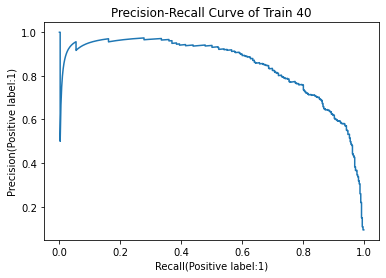

In [109]:
precision_train40, recall_train40, thresholds_train40 = precision_recall_curve(y_train, y_train_score40)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrain40 = auc(recall_train40, precision_train40)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrain40))

# plot PR curve
plt.plot(recall_train40, precision_train40)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train 40')

PR-AUC is 0.91


Text(0.5, 1.0, 'Precision-Recall Curve of Test 40')

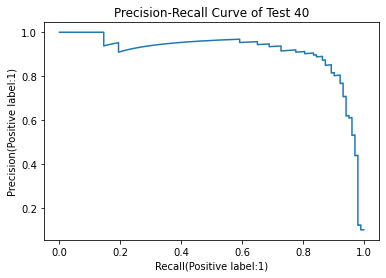

In [110]:
precision_test40, recall_test40, thresholds_test40 = precision_recall_curve(y_test, y_test_score40)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltest40 = auc(recall_test40, precision_test40)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltest40))

# plot PR curve
plt.plot(recall_test40, precision_test40)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test 40')

In [490]:
crossval_scores40 = cross_val_score(model1_balanced40, X_train_reduced40, y_train, scoring = 'average_precision', cv=5)
crossval_scores40

array([0.87907575, 0.88580058, 0.82067217, 0.74227403, 0.76790636])

In [491]:
crossval_scores40.mean()

0.8191457780701847

In [ ]:
# 2.4 35 features

In [111]:
pipeline35 = Pipeline([
    ('selector', SelectFromModel(estimator=LogisticRegression(random_state=42,max_iter=10000), max_features=35, threshold=-np.inf)),
    ('regressor',LogisticRegression())
])

pipeline35.fit(X_train, y_train)

selected_features35 = pipeline35['selector'].get_support()
print(selected_features35.sum())

35


In [112]:
selected_features_names35 = X_train.columns[selected_features35].tolist()
print(selected_features_names35)

['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'ClmsperBene', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_42731', 'totalDiagCode_41401', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']


In [113]:
X_train_reduced35 = X_train[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'ClmsperBene', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_42731', 'totalDiagCode_41401', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [114]:
X_test_reduced35 = X_test[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'ClmsperBene', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_42731', 'totalDiagCode_41401', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [115]:
steps1_balanced35 = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(C=1.0, penalty ='l2', solver = 'saga' , class_weight = 'balanced',random_state=42,max_iter=10000))]
model1_balanced35 = Pipeline(steps1_balanced35)
model1_balanced35.fit(X_train_reduced35, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42, solver='saga'))])

In [116]:
y_train_pred35= model1_balanced35.predict(X_train_reduced35)
y_test_pred35 = model1_balanced35.predict(X_test_reduced35)

y_train_proba35 = model1_balanced35.predict_proba(X_train_reduced35)
y_test_proba35= model1_balanced35.predict_proba(X_test_reduced35)

y_train_score35 = y_train_proba35[:, 1]
y_test_score35 = y_test_proba35[:, 1]

In [117]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred35))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred35))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      3925
           1       0.55      0.95      0.70       403

    accuracy                           0.92      4328
   macro avg       0.77      0.93      0.83      4328
weighted avg       0.95      0.92      0.93      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       979
           1       0.91      0.20      0.33       103

    accuracy                           0.92      1082
   macro avg       0.92      0.60      0.65      1082
weighted avg       0.92      0.92      0.90      1082



PR-AUC is 0.85


Text(0.5, 1.0, 'Precision-Recall Curve of Train 35')

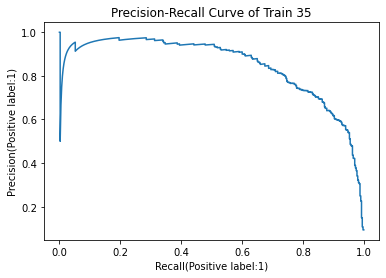

In [118]:
precision_train35, recall_train35, thresholds_train35 = precision_recall_curve(y_train, y_train_score35)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrain35 = auc(recall_train35, precision_train35)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrain35))

# plot PR curve
plt.plot(recall_train35, precision_train35)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train 35')

PR-AUC is 0.91


Text(0.5, 1.0, 'Precision-Recall Curve of Test 35')

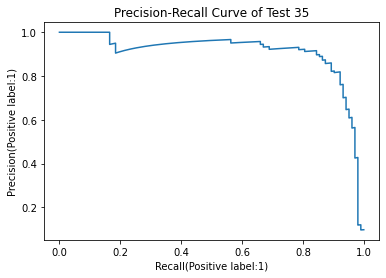

In [119]:
precision_test35, recall_test35, thresholds_test35 = precision_recall_curve(y_test, y_test_score35)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltest35 = auc(recall_test35, precision_test35)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltest35))

# plot PR curve
plt.plot(recall_test35, precision_test35)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test 35')

In [120]:
crossval_scores35 = cross_val_score(model1_balanced35, X_train_reduced35, y_train, scoring = 'average_precision', cv=5)
crossval_scores35

NameError: name 'cross_val_score' is not defined

In [500]:
crossval_scores35.mean()

0.8239430315860925

In [ ]:
# 2.4 30 features

In [121]:
pipeline30 = Pipeline([
    ('selector', SelectFromModel(estimator=LogisticRegression(random_state=42,max_iter=10000), max_features=30, threshold=-np.inf)),
    ('regressor',LogisticRegression())
])

pipeline30.fit(X_train, y_train)

selected_features30 = pipeline30['selector'].get_support()
print(selected_features30.sum())

30


In [122]:
selected_features_names30 = X_train.columns[selected_features30].tolist()
print(selected_features_names30)

['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'totalDiagCode_4019', 'totalDiagCode_42731', 'totalDiagCode_41401', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']


In [123]:
X_train_reduced30 = X_train[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'totalDiagCode_4019', 'totalDiagCode_42731', 'totalDiagCode_41401', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [124]:
X_test_reduced30 = X_test[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'totalDiagCode_4019', 'totalDiagCode_42731', 'totalDiagCode_41401', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [147]:
steps1_balanced30 = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(C=0.01, penalty ='l2', solver = 'newton-cg' , class_weight = 'balanced',random_state=42,max_iter=10000))]
model1_balanced30 = Pipeline(steps1_balanced30)
model1_balanced30.fit(X_train_reduced30, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=10000, random_state=42,
                                    solver='newton-cg'))])

In [148]:
y_train_pred30 = model1_balanced30.predict(X_train_reduced30)
y_test_pred30 = model1_balanced30.predict(X_test_reduced30)

y_train_proba30 = model1_balanced30.predict_proba(X_train_reduced30)
y_test_proba30 = model1_balanced30.predict_proba(X_test_reduced30)

y_train_score30 = y_train_proba30[:, 1]
y_test_score30 = y_test_proba30[:, 1]

In [149]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred30))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred30))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3925
           1       0.49      0.91      0.64       403

    accuracy                           0.90      4328
   macro avg       0.74      0.91      0.79      4328
weighted avg       0.94      0.90      0.92      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       979
           1       0.88      0.66      0.76       103

    accuracy                           0.96      1082
   macro avg       0.92      0.83      0.87      1082
weighted avg       0.96      0.96      0.96      1082



PR-AUC is 0.84


Text(0.5, 1.0, 'Precision-Recall Curve of Train 30')

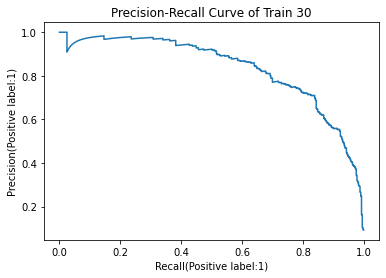

In [143]:
precision_train30, recall_train30, thresholds_train30 = precision_recall_curve(y_train, y_train_score30)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrain30 = auc(recall_train30, precision_train30)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrain30))

# plot PR curve
plt.plot(recall_train30, precision_train30)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train 30')

PR-AUC is 0.85


Text(0.5, 1.0, 'Precision-Recall Curve of Test 30')

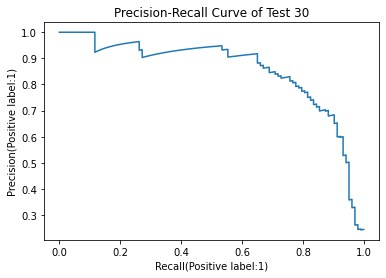

In [150]:
precision_test30, recall_test30, thresholds_test30 = precision_recall_curve(y_test, y_test_score30)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltest30 = auc(recall_test30, precision_test30)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltest30))

# plot PR curve
plt.plot(recall_test30, precision_test30)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test 30')

In [137]:
crossval_scores30 = cross_val_score(model1_balanced35, X_train_reduced35, y_train, scoring = 'average_precision', cv=5)
crossval_scores30

NameError: name 'cross_val_score' is not defined

In [544]:
crossval_scores30.mean()

0.8239430315860925

Text(0.5, 1.0, 'Precision and Recall Score versus Threshold-top 30 features')

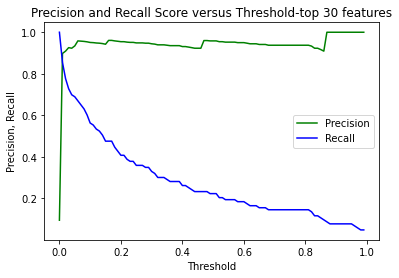

In [140]:
thresholds2 = np.arange(0, 1.0, 0.01)
precision_lst2=[]
recall_lst2=[]
# f1_lst = []
for i in thresholds2:
    y_test_pred30  = (y_test_proba30[:, 1]>= i).astype(int)
    precision_lst2.append(precision_score(y_test, y_test_pred30))
    recall_lst2.append(recall_score(y_test, y_test_pred30))
    #f1_lst.append(f1_score(y_test, y_test_prednew))
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds2, precision_lst2, "g-", label="Precision")
plt.plot(thresholds2, recall_lst2, "b-", label="Recall")
#plt.plot(thresholds, f1_lst, "r-", label="f1")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.title('Precision and Recall Score versus Threshold-top 30 features')

Text(0.5, 1.0, 'Precision-Recall versus Threshold (30 features)')

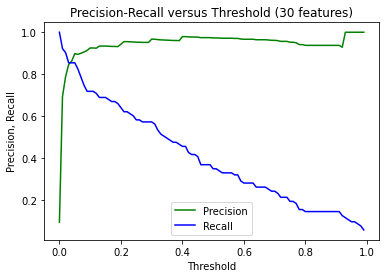

In [146]:
#c=0.1

thresholds2 = np.arange(0, 1.0, 0.01)
precision_lst2=[]
recall_lst2=[]
# f1_lst = []
for i in thresholds2:
    y_test_pred30  = (y_test_proba30[:, 1]>= i).astype(int)
    precision_lst2.append(precision_score(y_test, y_test_pred30))
    recall_lst2.append(recall_score(y_test, y_test_pred30))
    #f1_lst.append(f1_score(y_test, y_test_prednew))
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds2, precision_lst2, "g-", label="Precision")
plt.plot(thresholds2, recall_lst2, "b-", label="Recall")
#plt.plot(thresholds, f1_lst, "r-", label="f1")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower center")
plt.title('Precision-Recall versus Threshold (30 features)')

Text(0.5, 1.0, 'Precision and Recall Score versus Threshold-top 30 features')

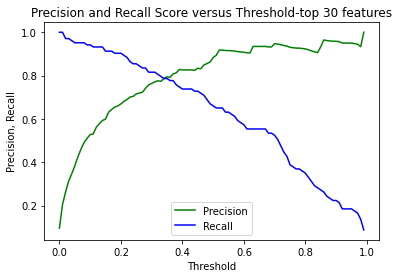

In [154]:
c=0.01

thresholds2 = np.arange(0, 1.0, 0.01)
precision_lst2=[]
recall_lst2=[]
# f1_lst = []
for i in thresholds2:
    y_test_pred30  = (y_test_proba30[:, 1]>= i).astype(int)
    precision_lst2.append(precision_score(y_test, y_test_pred30))
    recall_lst2.append(recall_score(y_test, y_test_pred30))
    #f1_lst.append(f1_score(y_test, y_test_prednew))
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds2, precision_lst2, "g-", label="Precision")
plt.plot(thresholds2, recall_lst2, "b-", label="Recall")
#plt.plot(thresholds, f1_lst, "r-", label="f1")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower center")
plt.title('Precision and Recall Score versus Threshold-top 30 features')

In [ ]:
# 20 features

In [155]:
pipeline20 = Pipeline([
    ('selector', SelectFromModel(estimator=LogisticRegression(random_state=42,max_iter=10000), max_features=20, threshold=-np.inf)),
    ('regressor',LogisticRegression())
])

pipeline20.fit(X_train, y_train)

selected_features20 = pipeline20['selector'].get_support()
print(selected_features20.sum())

20


In [156]:
selected_features_names20 = X_train.columns[selected_features20].tolist()
print(selected_features_names20)

['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'Age', 'uniqBeneCount', 'uniqATPhysnCount', 'ClmsperATPhysn', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'totalDiagCode_4019', 'totalDiagCode_Other']


In [157]:
X_train_reduced20 = X_train[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'Age', 'uniqBeneCount', 'uniqATPhysnCount', 'ClmsperATPhysn', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'totalDiagCode_4019', 'totalDiagCode_Other']]

In [158]:
X_test_reduced20 = X_test[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualDeductibleAmt_mean', 'Age', 'uniqBeneCount', 'uniqATPhysnCount', 'ClmsperATPhysn', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'totalDiagCode_4019', 'totalDiagCode_Other']]

In [159]:
steps1_balanced20 = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(C=10, penalty ='l2', solver = 'newton-cg' , class_weight = 'balanced',random_state=42,max_iter=10000))]
model1_balanced20 = Pipeline(steps1_balanced20)
model1_balanced20.fit(X_train_reduced20, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=10, class_weight='balanced',
                                    max_iter=10000, random_state=42,
                                    solver='newton-cg'))])

In [160]:
y_train_pred20 = model1_balanced20.predict(X_train_reduced20)
y_test_pred20 = model1_balanced20.predict(X_test_reduced20)

y_train_proba20 = model1_balanced20.predict_proba(X_train_reduced20)
y_test_proba20 = model1_balanced20.predict_proba(X_test_reduced20)

y_train_score20 = y_train_proba20[:, 1]
y_test_score20 = y_test_proba20[:, 1]

In [161]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred20))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred20))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3925
           1       0.47      0.90      0.62       403

    accuracy                           0.90      4328
   macro avg       0.73      0.90      0.78      4328
weighted avg       0.94      0.90      0.91      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       979
           1       0.43      0.88      0.58       103

    accuracy                           0.88      1082
   macro avg       0.71      0.88      0.76      1082
weighted avg       0.93      0.88      0.90      1082



PR-AUC is 0.71


Text(0.5, 1.0, 'Precision-Recall Curve of Train 20')

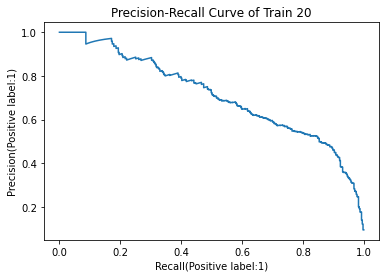

In [162]:
precision_train20, recall_train20, thresholds_train20 = precision_recall_curve(y_train, y_train_score20)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrain20 = auc(recall_train20, precision_train20)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrain20))

# plot PR curve
plt.plot(recall_train20, precision_train20)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train 20')

PR-AUC is 0.68


Text(0.5, 1.0, 'Precision-Recall Curve of Test 20')

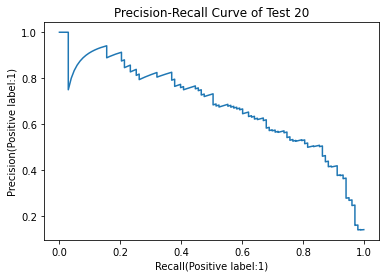

In [163]:
precision_test20, recall_test20, thresholds_test20 = precision_recall_curve(y_test, y_test_score20)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltest20 = auc(recall_test20, precision_test20)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltest20))

# plot PR curve
plt.plot(recall_test20, precision_test20)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test 20')

In [164]:
crossval_scores20 = cross_val_score(model1_balanced20, X_train_reduced20, y_train, scoring = 'average_precision', cv=5)
crossval_scores20

NameError: name 'cross_val_score' is not defined

In [570]:
crossval_scores20.mean()

0.7038143080652526

#### III. Cross Validation

#### 3.1 With all features

In [ ]:
from xgboost import cv

In [ ]:

from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

iris = load_iris()
x, y = iris.data, iris.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

xgbc = XGBClassifier()
print(xgbc)

xgbc.fit(xtrain, ytrain)

# - cross validataion
scores = cross_val_score(xgbc, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbc.predict(xtest)
cm = confusion_matrix(ytest,ypred)
print(cm)

# PR-AUC Comparison

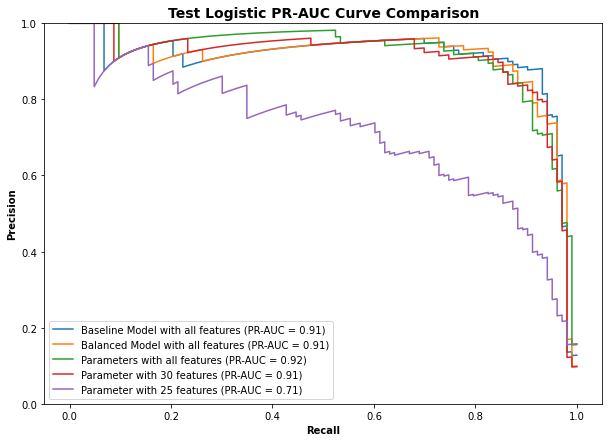

In [576]:
# Intitialize figure with two plots
fig, ax = plt.subplots()
# fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(10)
fig.set_facecolor('white')

ax.plot(recall_test, precision_test, label='Baseline Model with all features (PR-AUC = {:0.2f})'.format(auc_precision_recall_test))
ax.plot(recall_testbal, precision_testbal, label='Balanced Model with all features (PR-AUC = {:0.2f})'\
        .format(auc_precision_recalltestbal))
# ax.plot(recall_testbal, precision_testbal, label='Balanced Model with all features ')
ax.plot(recall_testbal1, precision_testbal1, label='Parameters with all features (PR-AUC = {:0.2f})'.format(auc_precision_recalltestbal1))
#ax.plot(recall1_testbal50, precision1_testbal50, label='Parameter with 50 features (PR-AUC = {:0.2f})'.format(auc_precision1_recalltestbal50))
ax.plot(recall_test30, precision_test30, label='Parameter with 30 features (PR-AUC = {:0.2f})'.format(auc_precision_recalltest30))
ax.plot(recall1_testbal25, precision1_testbal25, label='Parameter with 25 features (PR-AUC = {:0.2f})'.format(auc_precision1_recalltestbal25)) 


## Configure x and y axis
ax.set_xlabel('Recall', fontweight='bold')
ax.set_ylabel('Precision', fontweight='bold')
ax.set_ylim(0, 1)
## Create legend & title
ax.set_title('Test Logistic PR-AUC Curve Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower left')

plt.show()





In [ ]:
# reduced features comparison

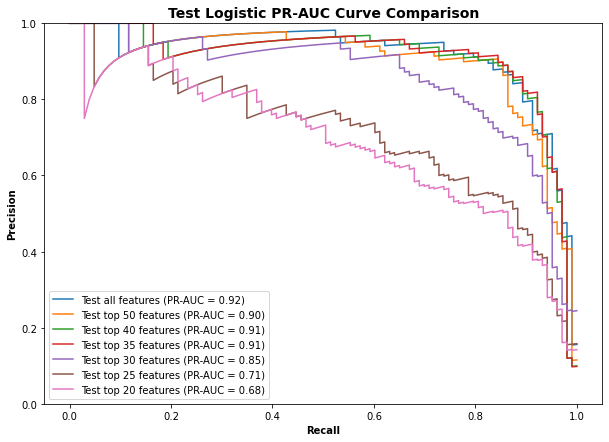

In [167]:
# Intitialize figure with two plots
fig, ax = plt.subplots()
# fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(10)
fig.set_facecolor('white')

#ax.plot(recall_test, precision_test, label='Baseline Model with all features (PR-AUC = {:0.2f})'.format(auc_precision_recall_test))
#ax.plot(recall_testbal, precision_testbal, label='Balanced Model with all features (PR-AUC = {:0.2f})'\
       # .format(auc_precision_recalltestbal))
# ax.plot(recall_testbal, precision_testbal, label='Balanced Model with all features ')
ax.plot(recall_testbal1, precision_testbal1, label='Test all features (PR-AUC = {:0.2f})'.format(auc_precision_recalltestbal1))
ax.plot(recall1_testbal50, precision1_testbal50, label='Test top 50 features (PR-AUC = {:0.2f})'.format(auc_precision1_recalltestbal50))
ax.plot(recall_test40, precision_test40, label='Test top 40 features (PR-AUC = {:0.2f})'.format(auc_precision_recalltest40))
ax.plot(recall_test35, precision_test35, label='Test top 35 features (PR-AUC = {:0.2f})'.format(auc_precision_recalltest35))
ax.plot(recall_test30, precision_test30, label='Test top 30 features (PR-AUC = {:0.2f})'.format(auc_precision_recalltest30))
ax.plot(recall1_testbal25, precision1_testbal25, label='Test top 25 features (PR-AUC = {:0.2f})'.format(auc_precision1_recalltestbal25)) 
ax.plot(recall_test20, precision_test20, label='Test top 20 features (PR-AUC = {:0.2f})'.format(auc_precision_recalltest20))

## Configure x and y axis
ax.set_xlabel('Recall', fontweight='bold')
ax.set_ylabel('Precision', fontweight='bold')
ax.set_ylim(0, 1)
## Create legend & title
ax.set_title('Test Logistic PR-AUC Curve Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower left')

plt.show()




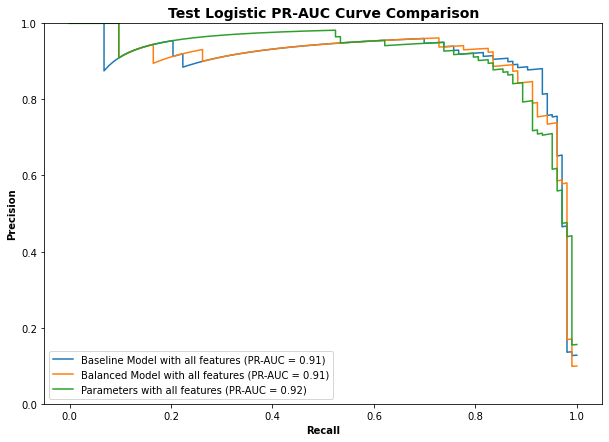

In [351]:
# Intitialize figure with two plots
fig, ax = plt.subplots()
# fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(10)
fig.set_facecolor('white')

ax.plot(recall_test, precision_test, label='Baseline Model with all features (PR-AUC = {:0.2f})'.format(auc_precision_recall_test))
ax.plot(recall_testbal, precision_testbal, label='Balanced Model with all features (PR-AUC = {:0.2f})'\
        .format(auc_precision_recalltestbal))
#ax.plot(recall_testbal, precision_testbal, label='Balanced Model with all features ')
ax.plot(recall_testbal1, precision_testbal1, label='Parameters with all features (PR-AUC = {:0.2f})'.format(auc_precision_recalltestbal1))
#ax.plot(recall1_testbal50, precision1_testbal50, label='Parameter with 50 features (PR-AUC = {:0.2f})'.format(auc_precision1_recalltestbal50)) 
# ax.plot(recall1_testbal25, precision1_testbal25, label='Parameter with 25 features (PR-AUC = {:0.2f})'.format(auc_precision1_recalltestbal25)) 


## Configure x and y axis
ax.set_xlabel('Recall', fontweight='bold')
ax.set_ylabel('Precision', fontweight='bold')
ax.set_ylim(0, 1)
## Create legend & title
ax.set_title('Test Logistic PR-AUC Curve Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower left')

plt.show()



In [ ]:
# Intitialize figure with two plots
fig, ax = plt.subplots()
# fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(10)
fig.set_facecolor('white')

ax.plot(recall_test, precision_test, label='Baseline Model with all features (PR-AUC = {:0.2f})'.format(auc_precision_recall_test))
#ax.plot(recall_testbal, precision_testbal, label='Balanced Model with all features (PR-AUC = {:0.2f})'\
        #.format(auc_precision_recalltestbal))
#ax.plot(recall_testbal, precision_testbal, label='Balanced Model with all features ')
ax.plot(recall_testbal1, precision_testbal1, label='Parameters with all features (PR-AUC = {:0.2f})'.format(auc_precision_recalltestbal1))
ax.plot(recall1_testbal50, precision1_testbal50, label='Parameter with 50 features (PR-AUC = {:0.2f})'.format(auc_precision1_recalltestbal50)) 
ax.plot(recall1_testbal25, precision1_testbal25, label='Parameter with 25 features (PR-AUC = {:0.2f})'.format(auc_precision1_recalltestbal25)) 


## Configure x and y axis
ax.set_xlabel('Recall', fontweight='bold')
ax.set_ylabel('Precision', fontweight='bold')
ax.set_ylim(0, 1)
## Create legend & title
ax.set_title('Test Logistic PR-AUC Curve Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower left')

plt.show()




In [ ]:
steps = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(C = 0.1, penalty = 'l2', solver = 'newton-cg', class_weight = 'balanced',random_state=42,max_iter=10000))]
model = Pipeline(steps)

In [ ]:
train_scores = cross_val_score(model, X_train, y_train, scoring = 'average_precision', cv=5)

In [ ]:
train_scores.mean()